# **Student ID: C0900481**
# Name: Jumoke Yekeen
# Course:AML3104_Assignment-2

**Assignment**: The main goal is to predict whether the student will be recruited in campus placements

or not based on the available factors in the dataset. **bold text**

In [100]:
#impot libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
# upload the dataset
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

#DIsplay first 5 rows of the dataset
df_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# **Feature Descriptions**
sl_no: anonymous id unique to a given employee

gender: employee gender

ssc_p: SSC is Secondary School Certificate (Class 10th). ssc_p is the percentage of marks secured in Class 10th.

ssc_b: SSC Board. Binary feature.

hsc_p: HSC is Higher Secondary Certificate (Class 12th). hsc_p is the percentage of marks secured in Class 12th.

hsc_b: HSC Board. Binary feature.

hsc_s: HSC Subject. Feature with three categories.

degree_p: percentage of marks secured while acquiring the degree.

degree_t: branch in which the degree was acquired. Feature with three categories.

workex: Whether the employee has some work experience or not. Binary feature.

etest_p: percentage of marks secured in the placement exam.

specialisation: the specialization that an employee has. Binary feature.

mba_p: percentage of marks secured by an employee while doing his MBA.

status: whether the student was placed or not. Binary Feature. Target variable.

salary: annual compensation at which an employee was hired.


In [ ]:
#Statistics Summary of the dataset

df_train.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#Display information about the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


# **Pre-Processing**

In [ ]:
#Display total number of missing values for each column
df_train.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Handling Missing values

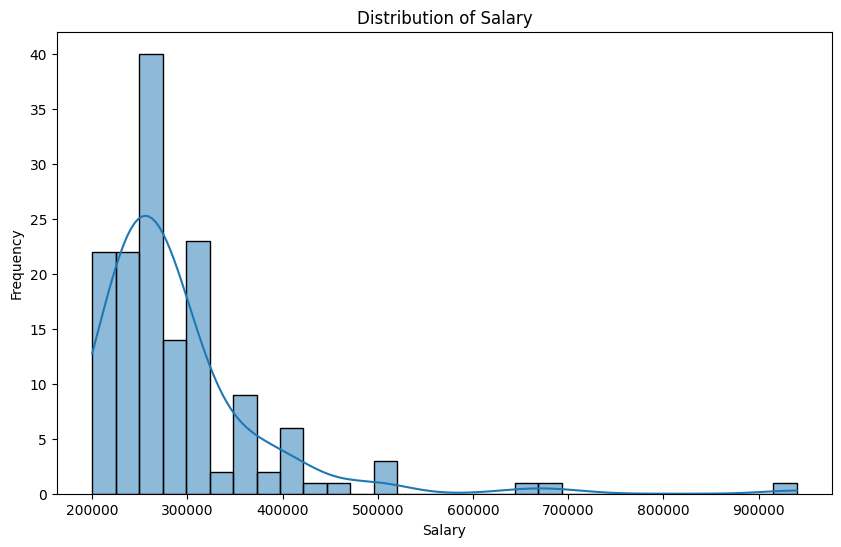

In [ ]:
# Visualize the distribution of the salary data before filling missing values
plt.figure(figsize=(10, 6))
sns.histplot(df_train['salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [102]:
# Fiiling the missing values with mean value of the distribution
mean_salary = df_train['salary'].mean()
df_train['salary'].fillna(mean_salary, inplace=True)


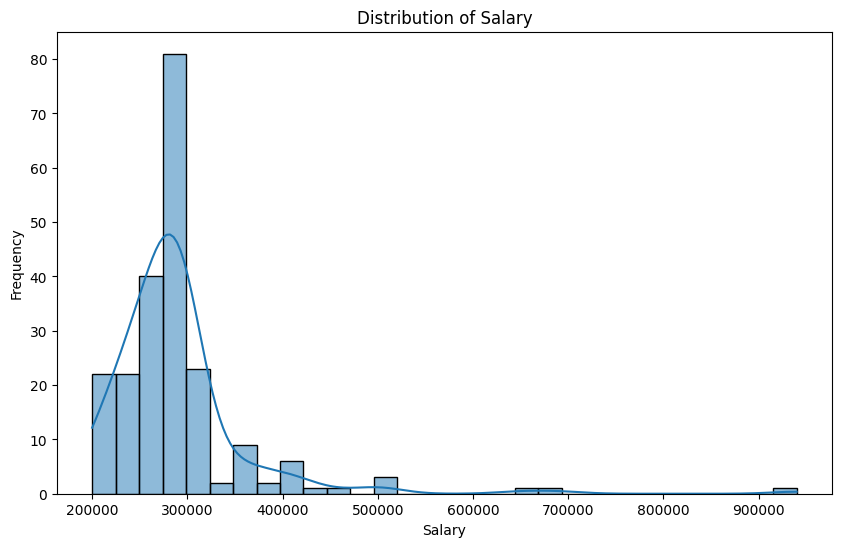

In [ ]:
# Visualize the distribution of the salary data
plt.figure(figsize=(10, 6))
sns.histplot(df_train['salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# **EXploratory Data Analysis (EDA)**

**Visualisation**

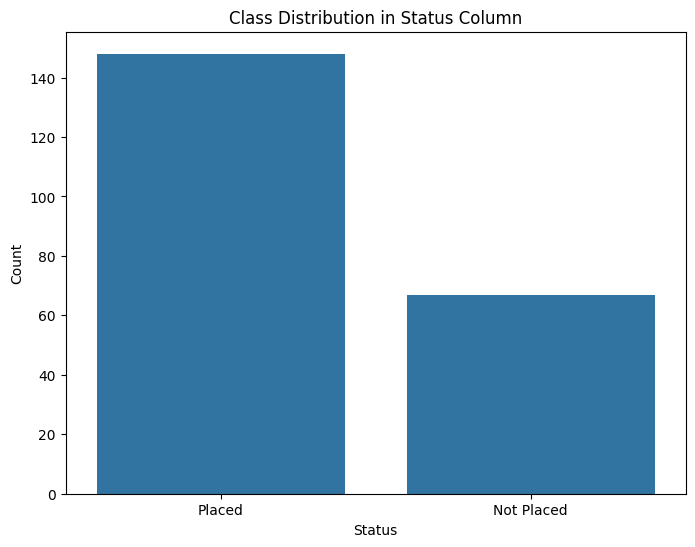

In [ ]:
# count plot of Status column
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df_train)
plt.title('Class Distribution in Status Column')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

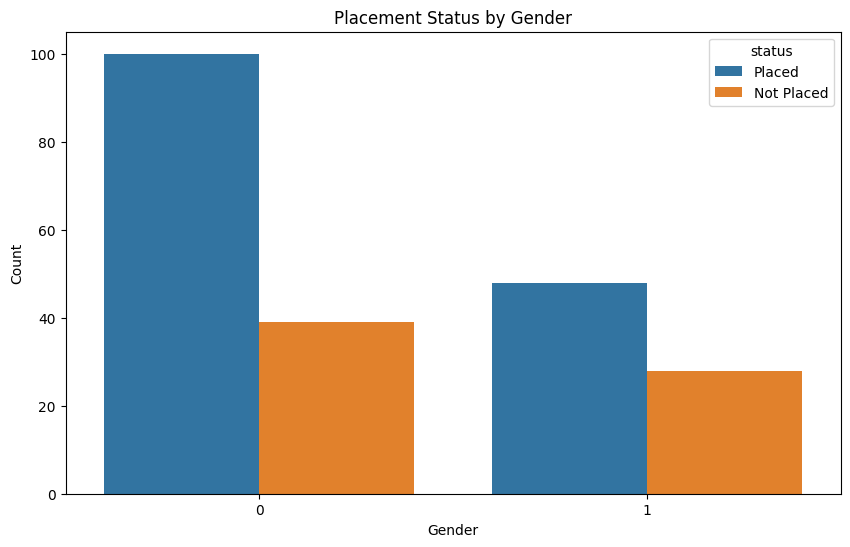

In [ ]:
# Count plot of placement status by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='status', data=df_train)
plt.title('Placement Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

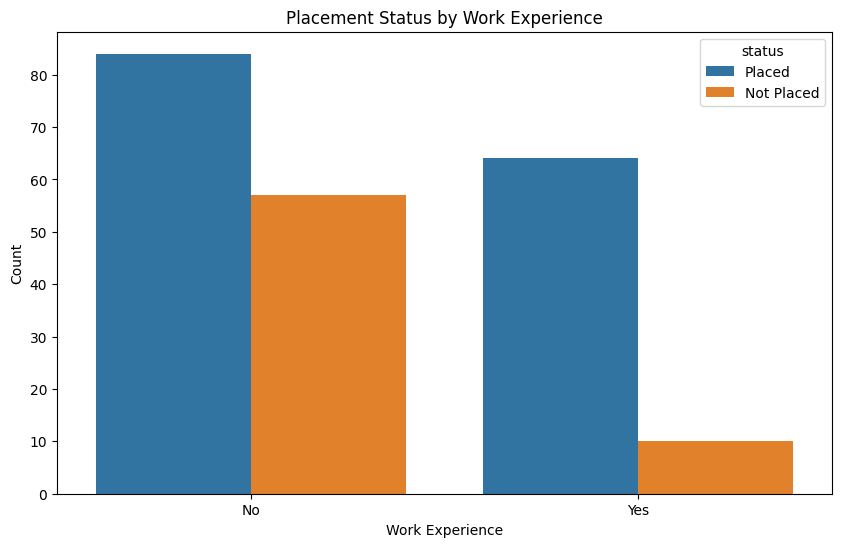

In [ ]:
# Count plot of placement status by work experience
plt.figure(figsize=(10, 6))
sns.countplot(x='workex', hue='status', data=df_train)
plt.title('Placement Status by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.show()

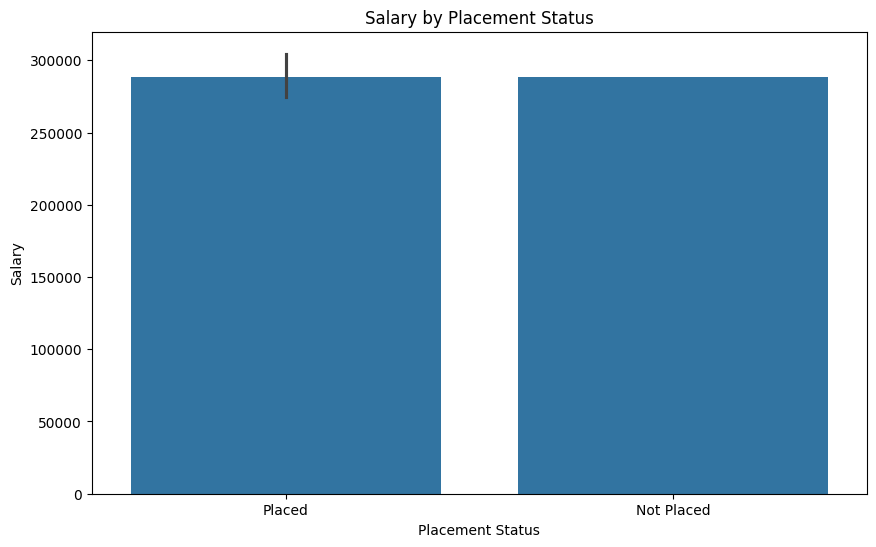

In [ ]:
#  Bar plot for Salary by Placement status
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='salary', data=df_train)
plt.title('Salary by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Salary')
plt.show()

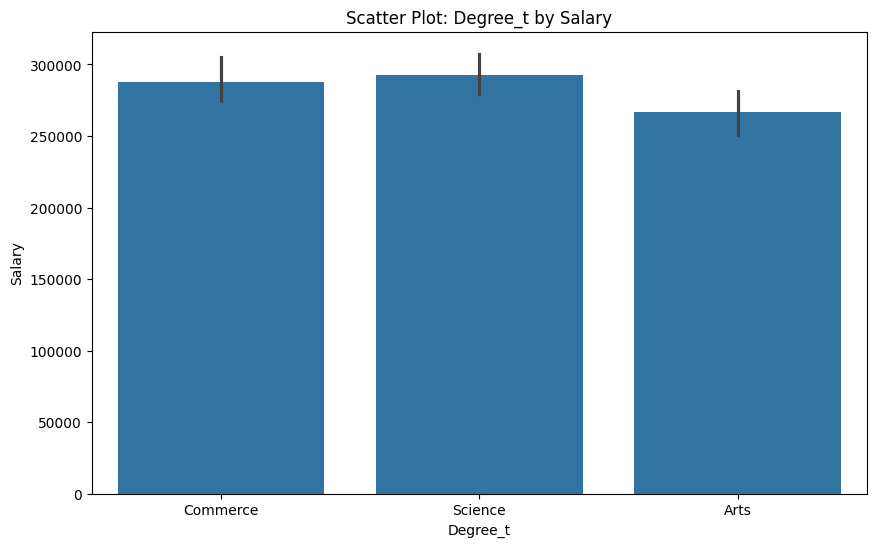

In [ ]:
# Bar plot for degree_t by salary
plt.figure(figsize=(10, 6))
sns.barplot(x=df_train['hsc_s'], y=df_train['salary'])
plt.title('Scatter Plot: Degree_t by Salary')
plt.xlabel('Degree_t')
plt.ylabel('Salary')
plt.show()

<Axes: >

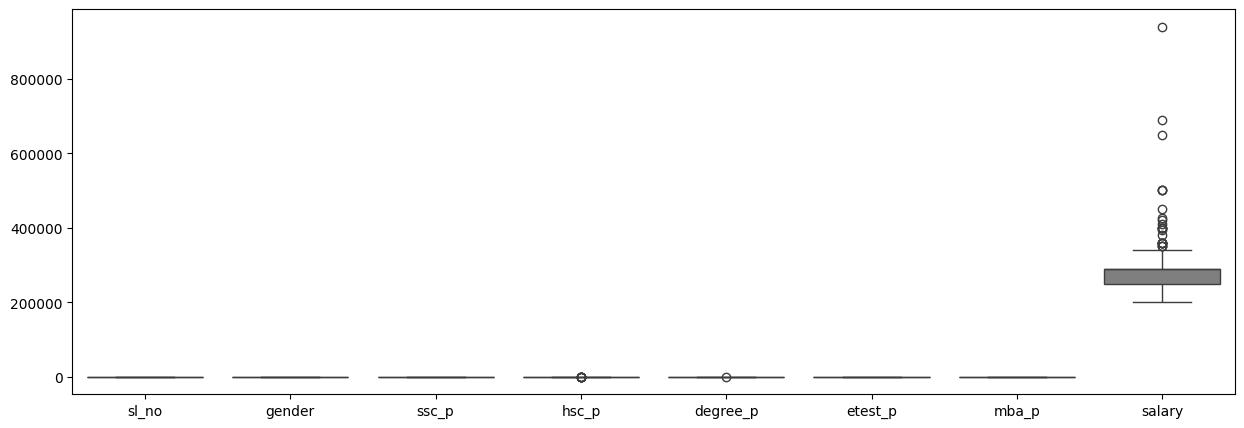

In [ ]:
#Box plot for all numerical features to show outliers

plt.figure(figsize=(15,5))
sns.boxplot(df_train)

In [ ]:
#list of Categorical features
categorical_features = ['ssc_b', 'hsc_b', 'hsc_s',' degree_t', ' workex', 'specialisation', 'status']


#List of Numerical features
numerical_features = ['sl_no', 'gender', 'ssc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

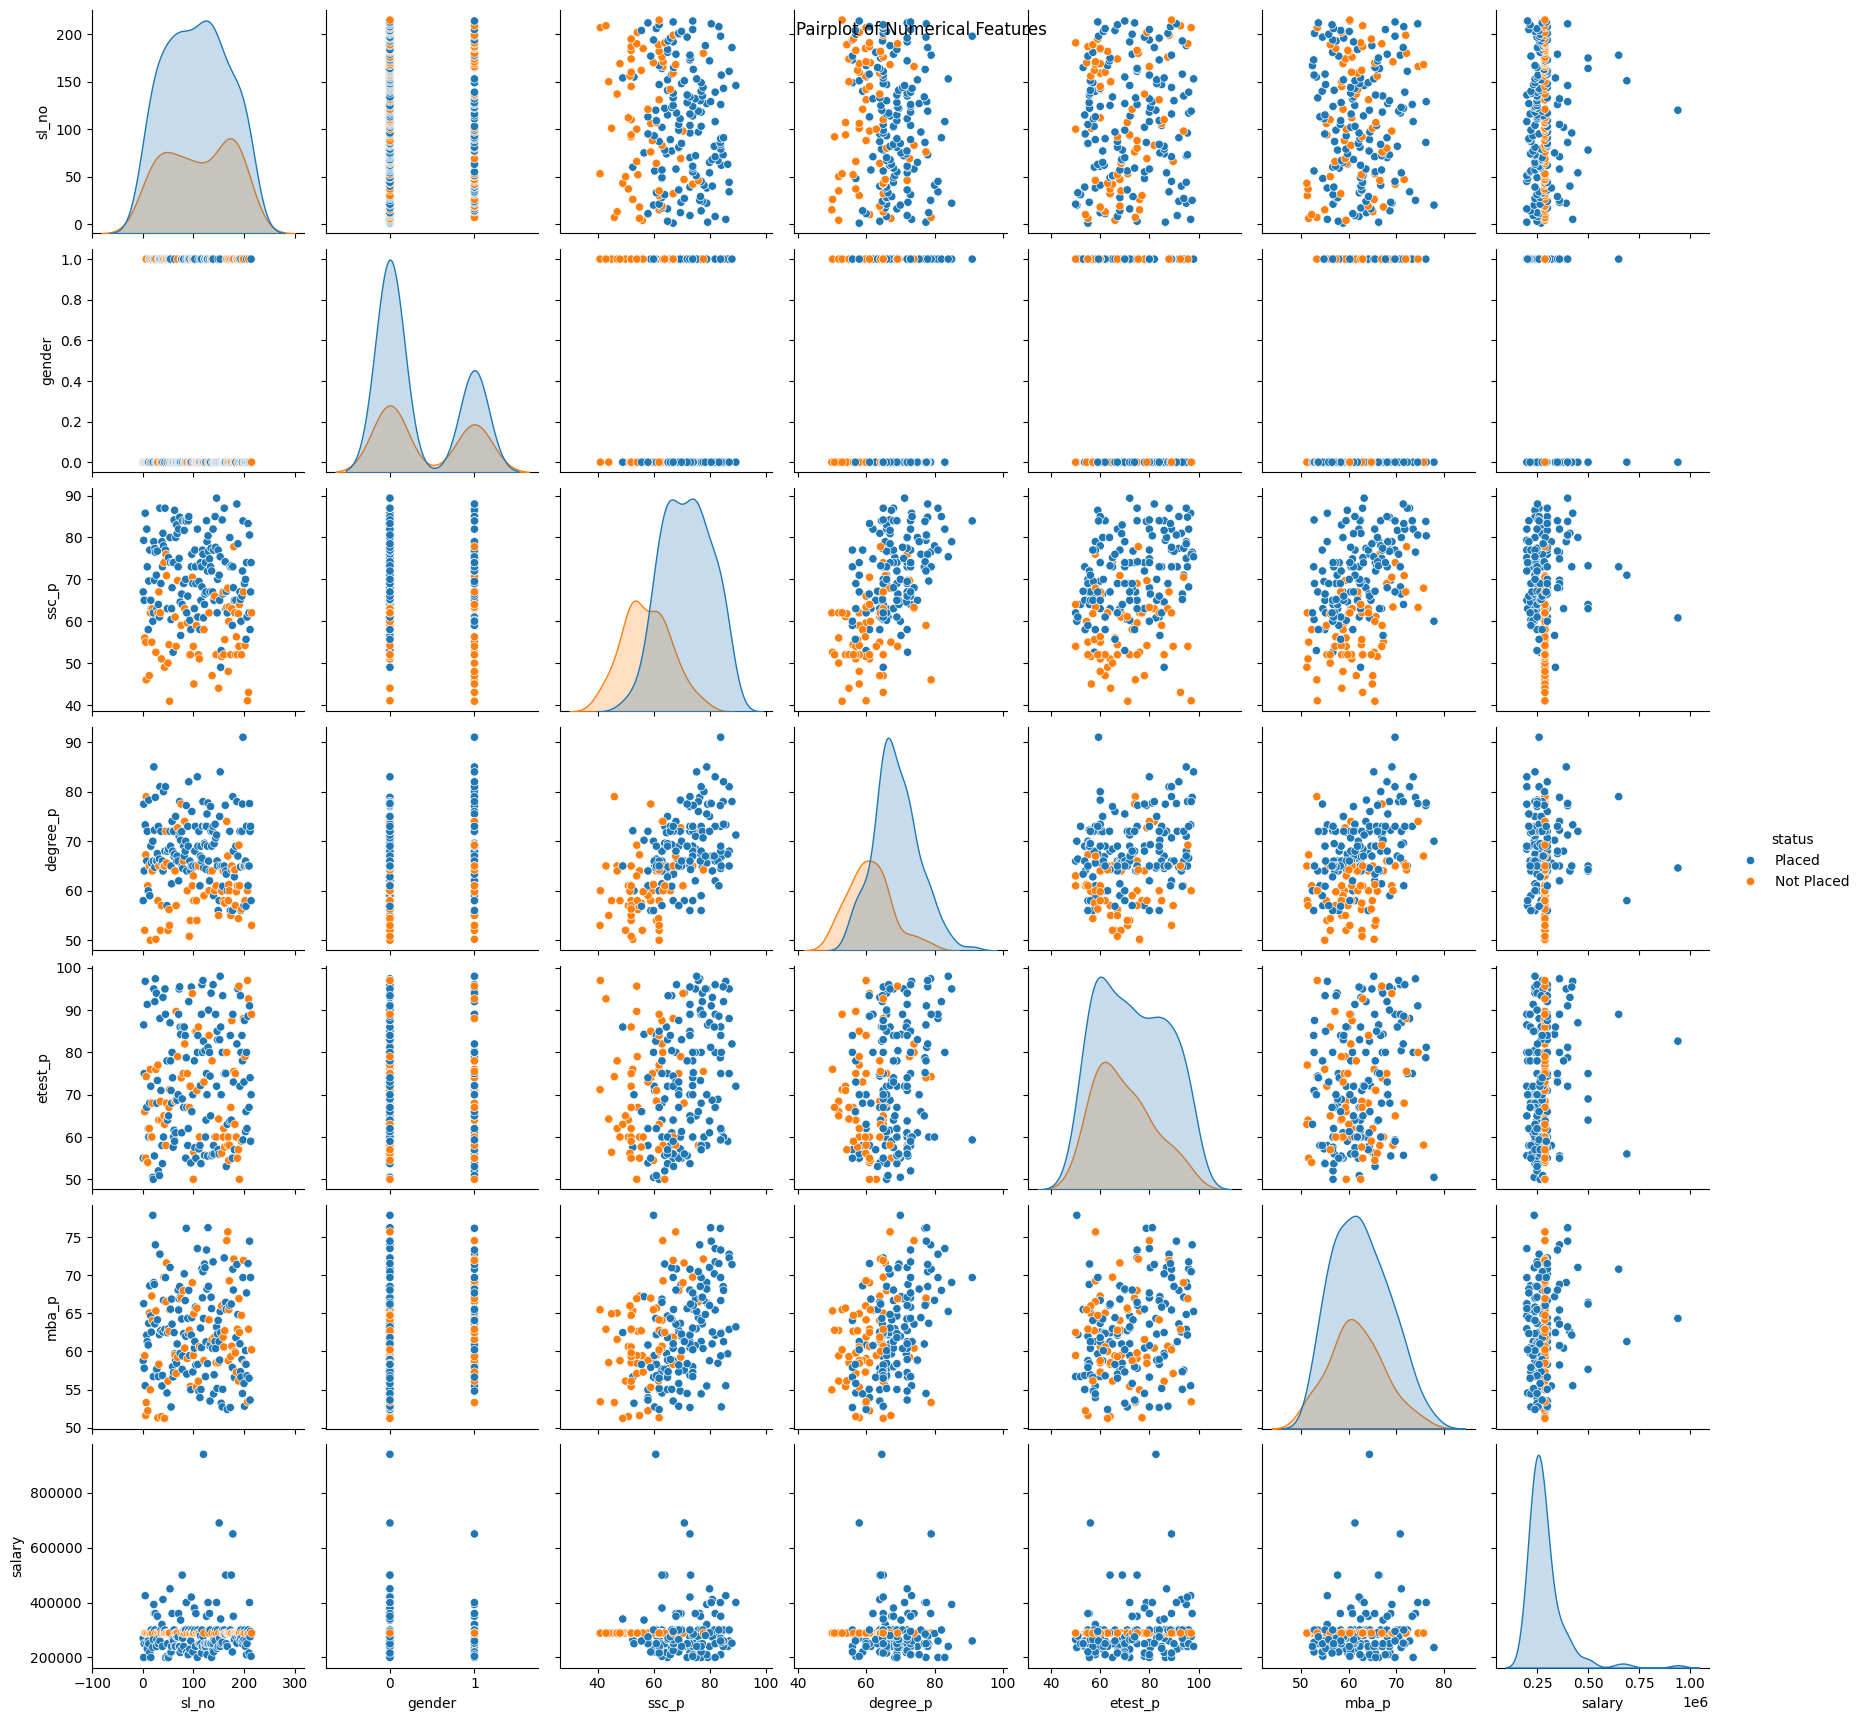

In [ ]:
#pairplot
sns.pairplot(df_train, vars=numerical_features, hue='status')
plt.suptitle('Pairplot of Numerical Features')
plt.show()


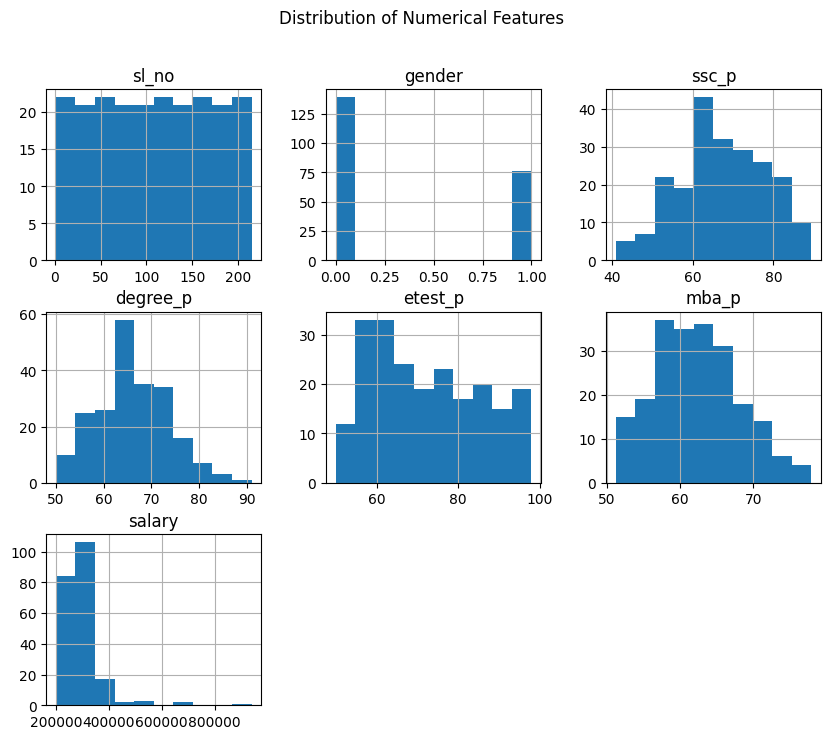

In [ ]:
#Histogram distribution of numerical features

df_train[numerical_features].hist(figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# **Model Building**

In [103]:
#Drop features that doesnt has effect
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay




In [104]:
# Drop unnecessary features
df_train.drop(['sl_no'], axis=1, inplace=True)

In [106]:
#Define independent and target features
X = df_train.drop(['status'], axis=1)
y = df_train['status']

In [107]:
# Encode Categorigatl features using one-Hot encoding
X = pd.get_dummies(X, columns=['ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'specialisation'], drop_first=True)


In [108]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# standardize the  columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
#Features reduction using PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Hyperparameter Tuning

In [111]:
#hyperparameter grids

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }

}




In [112]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),

}


In [116]:
# Train models with GridSearchCV
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_pca, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [117]:
# Create and train a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_models['Logistic Regression']),
    ('rf', best_models['Random Forest']),
    ('svm', best_models['SVM'])
], voting='hard')

voting_clf.fit(X_train_pca, y_train)
best_models['Voting Classifier'] = voting_clf





In [118]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Placed')
    recall = recall_score(y_test, y_pred, pos_label='Placed')
    f1 = f1_score(y_test, y_pred, pos_label='Placed')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Evaluate individual models
metrics = {
    "Models": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Confusion Matrix": []
}
for model_name, model in best_models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_test_pca, y_test)
    metrics["Models"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    metrics["Confusion Matrix"].append(cm)



Models Metrics Performance Visualization

                Models  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.753846   0.769231  0.909091  0.833333   
1        Random Forest  0.753846   0.759259  0.931818  0.836735   
2                  SVM  0.769231   0.763636  0.954545  0.848485   
3    Voting Classifier  0.753846   0.759259  0.931818  0.836735   

     Confusion Matrix  
0  [[9, 12], [4, 40]]  
1  [[8, 13], [3, 41]]  
2  [[8, 13], [2, 42]]  
3  [[8, 13], [3, 41]]  


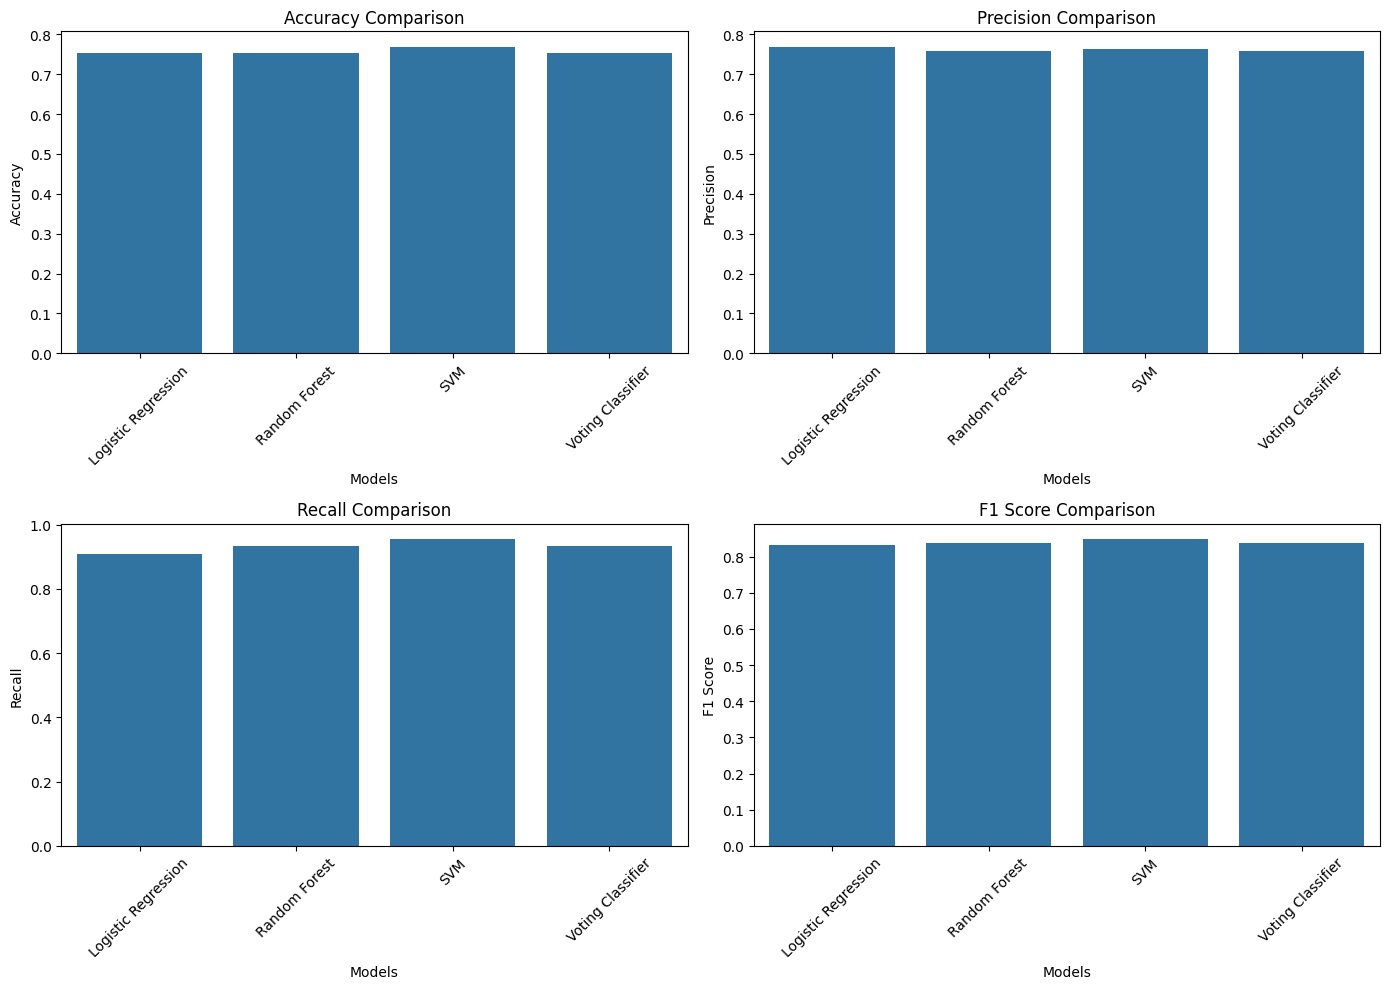

In [119]:
# Convert metrics to DataFrame
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# Plotting metrics comparisons
plt.figure(figsize=(14, 10))

# Accuracy Bar Plot
plt.subplot(2, 2, 1)
sns.barplot(x="Models", y="Accuracy", data=df_metrics)
plt.title("Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")

# Precision Bar Plot
plt.subplot(2, 2, 2)
sns.barplot(x="Models", y="Precision", data=df_metrics)
plt.title("Precision Comparison")
plt.xticks(rotation=45)
plt.ylabel("Precision")

# Recall Bar Plot
plt.subplot(2, 2, 3)
sns.barplot(x="Models", y="Recall", data=df_metrics)
plt.title("Recall Comparison")
plt.xticks(rotation=45)
plt.ylabel("Recall")

# F1 Score Bar Plot
plt.subplot(2, 2, 4)
sns.barplot(x="Models", y="F1 Score", data=df_metrics)
plt.title("F1 Score Comparison")
plt.xticks(rotation=45)
plt.ylabel("F1 Score")

plt.tight_layout()
plt.show()



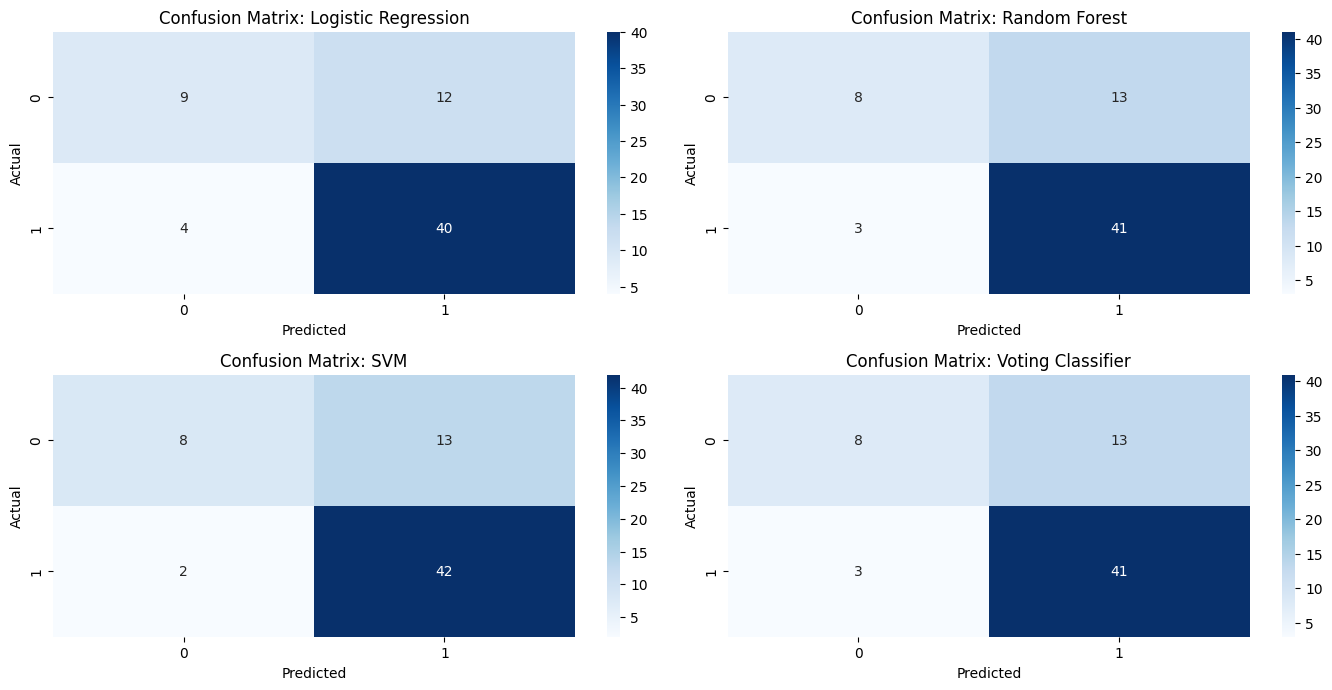

In [120]:
# Plotting confusion matrices
plt.figure(figsize=(14, 10))

for i, (model_name, cm) in enumerate(zip(df_metrics['Models'], df_metrics['Confusion Matrix'])):
    plt.subplot(3, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()